# IMPORTAR

In [1]:
import pandas as pd
import numpy as np
import json


# PREPROCESAMIENTO - NORMALIZACION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer



# DIRECCION DE LOS ARCHIVOS

In [2]:
DATA_DIR = "/Users/laqui/OneDrive/Documentos/PROYECTO_KAGGLE/"

# DATA_DIR = '/home/alumno/Escritorio/SIC_Parte2/proyecto/predict-energy-behavior-of-prosumers/'

# Read CSVs and parse relevant date columns
train = pd.read_csv(DATA_DIR + "train.csv")
client = pd.read_csv(DATA_DIR + "client.csv")
historical_weather = pd.read_csv(DATA_DIR + "historical_weather.csv")
forecast_weather = pd.read_csv(DATA_DIR + "forecast_weather.csv")
electricity = pd.read_csv(DATA_DIR + "electricity_prices.csv")
gas = pd.read_csv(DATA_DIR + "gas_prices.csv")

In [3]:
station_to_county = pd.read_csv(DATA_DIR + "weather_station_to_county_mapping.csv")

In [4]:
with open('county_id_to_name_map.json', 'r') as file:
    county_data = json.load(file)['county_data']

# PREPROCESAMIENTO

# FORECAST_WEATHER E HISTORICAL_WEATHER

## Seleccion de columnas utiles

In [5]:
## SELECCIONAR LAS COLUMNAS QUE USAR 

# ESPECIFICAR LAS COLUMNAS A USAR
# HISTORICAL
COLUMNAS_UTILES_H = ['latitude', 'longitude','datetime', 'temperature', 'dewpoint', 'rain', 'snowfall',
        'cloudcover_mid', 'direct_solar_radiation', 'data_block_id']
# FORECAST
COLUMNAS_UTILES_F = ['latitude', 'longitude', 'origin_datetime', 'hours_ahead', 'forecast_datetime','temperature',
        'dewpoint', 'total_precipitation','snowfall','cloudcover_mid', 'direct_solar_radiation','data_block_id']
# NUEVO 
forecast_weather = forecast_weather[COLUMNAS_UTILES_F]
historical_weather = historical_weather[COLUMNAS_UTILES_H]

## Convertir de latitud y longitud a county

In [6]:
## Lista limpia de latitudes y longitudes con su county y nombre, para poder ordenar las tablas de forecast

s1 = station_to_county[['latitude', 'longitude', 'county']]

In [7]:
s1['latitude'] = s1['latitude'].round(1)

C:\Users\laqui\AppData\Local\Temp\ipykernel_13092\771384542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1['latitude'] = s1['latitude'].round(1)


In [8]:
s1['longitude'] = s1['longitude'].round(1)

C:\Users\laqui\AppData\Local\Temp\ipykernel_13092\2463813523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1['longitude'] = s1['longitude'].round(1)


In [9]:
s1['county'].fillna(12.0, inplace=True)

C:\Users\laqui\AppData\Local\Temp\ipykernel_13092\3132485876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1['county'].fillna(12.0, inplace=True)


### FORECAST

In [10]:
# Fucionar los datasets por las latitudes y longitudes
merged_df = pd.merge( forecast_weather,s1, on=['latitude', 'longitude'], how='left')

# Se agregan nuevas columnas a la tabla de forecast
new_column_values = merged_df[['county']]

# Se actualiza la tabla original con las nuevas columnas
forecast_weather[['county']] = new_column_values


In [11]:
forecast_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424512 entries, 0 to 3424511
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   latitude                float64
 1   longitude               float64
 2   origin_datetime         object 
 3   hours_ahead             int64  
 4   forecast_datetime       object 
 5   temperature             float64
 6   dewpoint                float64
 7   total_precipitation     float64
 8   snowfall                float64
 9   cloudcover_mid          float64
 10  direct_solar_radiation  float64
 11  data_block_id           int64  
 12  county                  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 339.7+ MB


In [12]:
#Eliminar las filas que no tienen county asignado
forecast_weather.dropna(subset=['county'], inplace=True)

In [13]:
forecast_weather.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [14]:
forecast_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424512 entries, 0 to 3424511
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   origin_datetime         object 
 1   hours_ahead             int64  
 2   forecast_datetime       object 
 3   temperature             float64
 4   dewpoint                float64
 5   total_precipitation     float64
 6   snowfall                float64
 7   cloudcover_mid          float64
 8   direct_solar_radiation  float64
 9   data_block_id           int64  
 10  county                  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 287.4+ MB


### HISTORICAL

In [15]:
# Fucionar los datasets por las latitudes y longitudes
merged_df = pd.merge( historical_weather,s1, on=['latitude', 'longitude'], how='left')

# Se agregan nuevas columnas a la tabla de forecast
new_column_values = merged_df[['county']]

# Se actualiza la tabla original con las nuevas columnas
historical_weather[['county']] = new_column_values

In [16]:
#Eliminar las filas que no tienen county asignado
historical_weather.dropna(subset=['county'], inplace=True)

In [17]:
historical_weather.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [18]:
historical_weather.drop_duplicates(inplace=True)

In [19]:
historical_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640818 entries, 0 to 1710799
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   datetime                1640818 non-null  object 
 1   temperature             1640818 non-null  float64
 2   dewpoint                1640818 non-null  float64
 3   rain                    1640818 non-null  float64
 4   snowfall                1640818 non-null  float64
 5   cloudcover_mid          1640818 non-null  int64  
 6   direct_solar_radiation  1640818 non-null  float64
 7   data_block_id           1640818 non-null  int64  
 8   county                  1640818 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 125.2+ MB


## NORMALIZACIÓN

In [20]:
# Crear un objeto MinMaxScaler
scaler = StandardScaler()

#COLUMNAS DE INTERES
col_cambiar = ['temperature', 'dewpoint', 'rain', 'snowfall','cloudcover_mid', 'direct_solar_radiation']
col_cambiar2 = ['temperature','dewpoint', 'total_precipitation', 'snowfall', 'cloudcover_mid','direct_solar_radiation']

# Normalizar las columnas seleccionadas
# HISTORICAL
historical_weather[col_cambiar] = scaler.fit_transform(historical_weather[col_cambiar])
# FORECAST
forecast_weather[col_cambiar2] = scaler.fit_transform(forecast_weather[col_cambiar2])

## FORMATEAR HORAS

In [21]:
# If the column is not already in datetime format, you can convert it first
forecast_weather['origin_datetime'] = pd.to_datetime(forecast_weather['origin_datetime']).dt.tz_localize(None)
forecast_weather['forecast_datetime'] = pd.to_datetime(forecast_weather['forecast_datetime']).dt.tz_localize(None)

In [22]:
# If the column is not already in datetime format, you can convert it first
historical_weather['datetime'] = pd.to_datetime(historical_weather['datetime'])

In [23]:
forecast_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424512 entries, 0 to 3424511
Data columns (total 11 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   origin_datetime         datetime64[ns]
 1   hours_ahead             int64         
 2   forecast_datetime       datetime64[ns]
 3   temperature             float64       
 4   dewpoint                float64       
 5   total_precipitation     float64       
 6   snowfall                float64       
 7   cloudcover_mid          float64       
 8   direct_solar_radiation  float64       
 9   data_block_id           int64         
 10  county                  float64       
dtypes: datetime64[ns](2), float64(7), int64(2)
memory usage: 287.4 MB


## AGREGAR LA COLUMNA DE MEDIANA PARA FILAS CON MISMA FECHA Y COUNTY

In [24]:
## forecast
forecast_weather['temperature_m'] = forecast_weather.groupby(['origin_datetime', 'county'])['temperature'].transform('median')
forecast_weather['snowfall_m'] = forecast_weather.groupby(['origin_datetime', 'county'])['snowfall'].transform('median')
forecast_weather['direct_solar_radiation_m'] = forecast_weather.groupby(['origin_datetime', 'county'])['direct_solar_radiation'].transform('median')
forecast_weather['cloudcover_mid_m'] = forecast_weather.groupby(['origin_datetime', 'county'])['cloudcover_mid'].transform('median')

## historical
historical_weather['temperature_m'] = historical_weather.groupby(['datetime', 'county'])['temperature'].transform('median')
historical_weather['snowfall_m'] = historical_weather.groupby(['datetime', 'county'])['snowfall'].transform('median')
historical_weather['direct_solar_radiation_m'] = historical_weather.groupby(['datetime', 'county'])['direct_solar_radiation'].transform('median')
historical_weather['cloudcover_mid_m'] = historical_weather.groupby(['datetime', 'county'])['cloudcover_mid'].transform('median')


# VISUALIZACIÓN FINAL

In [25]:
# ELIMINAR DUPLICADOS DE FILAS CON MISMO DATETIME A COUNTY, PARA ESO SE HIZO LA MEDIA DE LAS TEMPERATURAS, ...

historical_weather = historical_weather.drop_duplicates(subset=['datetime','county'], keep='first')
historical_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244400 entries, 0 to 1710769
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   datetime                  244400 non-null  datetime64[ns]
 1   temperature               244400 non-null  float64       
 2   dewpoint                  244400 non-null  float64       
 3   rain                      244400 non-null  float64       
 4   snowfall                  244400 non-null  float64       
 5   cloudcover_mid            244400 non-null  float64       
 6   direct_solar_radiation    244400 non-null  float64       
 7   data_block_id             244400 non-null  int64         
 8   county                    244400 non-null  float64       
 9   temperature_m             244400 non-null  float64       
 10  snowfall_m                244400 non-null  float64       
 11  direct_solar_radiation_m  244400 non-null  float64       
 12  c

In [26]:
forecast_weather = forecast_weather.drop_duplicates(subset=['forecast_datetime','county'], keep='first')

In [27]:
forecast_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244992 entries, 0 to 3424481
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   origin_datetime           244992 non-null  datetime64[ns]
 1   hours_ahead               244992 non-null  int64         
 2   forecast_datetime         244992 non-null  datetime64[ns]
 3   temperature               244992 non-null  float64       
 4   dewpoint                  244992 non-null  float64       
 5   total_precipitation       244992 non-null  float64       
 6   snowfall                  244992 non-null  float64       
 7   cloudcover_mid            244992 non-null  float64       
 8   direct_solar_radiation    244992 non-null  float64       
 9   data_block_id             244992 non-null  int64         
 10  county                    244992 non-null  float64       
 11  temperature_m             244992 non-null  float64       
 12  s

# CLIENT, GAS_PRICE, ELECTRICITY_PRICE

## CLIENT

In [28]:
# Paso 2: Normalización 
scaler_client = StandardScaler()
client[['installed_capacity']] = scaler_client.fit_transform(client[['installed_capacity']])

# Paso 3: Extracción de Características Temporales
client['date'] = pd.to_datetime(client['date'])

# Crear nuevas variables temporales
client['day_of_week'] = client['date'].dt.dayofweek
client['month'] = client['date'].dt.month
client['year'] = client['date'].dt.year
client['day'] = client['date'].dt.day

# Visualizar los primeros registros del conjunto de datos después del procesamiento
client.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id,day_of_week,month,year,day
0,1,0,108,-0.205549,0,2021-09-01,2,2,9,2021,1
1,2,0,17,-0.530249,0,2021-09-01,2,2,9,2021,1
2,3,0,688,2.376806,0,2021-09-01,2,2,9,2021,1
3,0,0,5,-0.433808,1,2021-09-01,2,2,9,2021,1
4,1,0,43,-0.016420,1,2021-09-01,2,2,9,2021,1


## GAS PRICES

In [29]:
# Paso 2: Normalización
scaler_gas = StandardScaler()
gas[['lowest_price_per_mwh', 'highest_price_per_mwh']] = scaler_gas.fit_transform(
    gas[['lowest_price_per_mwh', 'highest_price_per_mwh']])

# Paso 3: Extracción de Características Temporales
gas['forecast_date'] = pd.to_datetime(gas['forecast_date'])
gas['origin_date'] = pd.to_datetime(gas['origin_date'])

# Crear nuevas variables temporales
# gas['hour_of_day'] = gas['forecast_date'].dt.hour
gas['day_of_week'] = gas['forecast_date'].dt.dayofweek
gas['month'] = gas['forecast_date'].dt.month
gas['year'] = gas['forecast_date'].dt.year
gas['day'] = gas['forecast_date'].dt.day

gas.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id,day_of_week,month,year,day
0,2021-09-01,-1.048233,-1.123105,2021-08-31,1,2,9,2021,1
1,2021-09-02,-1.040025,-1.123654,2021-09-01,2,3,9,2021,2
2,2021-09-03,-1.035185,-1.121643,2021-09-02,3,4,9,2021,3
3,2021-09-04,-1.025714,-1.114330,2021-09-03,4,5,9,2021,4
4,2021-09-05,-1.025714,-1.118352,2021-09-04,5,6,9,2021,5


## ELECTRICITY PRICES

In [30]:
# Paso 2: Normalización
scaler_electricity = StandardScaler()
electricity[['euros_per_mwh']] = scaler_electricity.fit_transform(electricity[['euros_per_mwh']])


# Paso 3: Extracción de Características Temporales
electricity['forecast_date'] = pd.to_datetime(electricity['forecast_date'])
electricity['origin_date'] = pd.to_datetime(electricity['origin_date'])

# Crear nuevas variables temporales
# electricity['hour_of_day'] = electricity['forecast_date'].dt.hour
electricity['day_of_week'] = electricity['forecast_date'].dt.dayofweek
electricity['month'] = electricity['forecast_date'].dt.month
electricity['year'] = electricity['forecast_date'].dt.year
electricity['hour_of_day'] = electricity['forecast_date'].dt.hour 

electricity.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id,day_of_week,month,year,hour_of_day
0,2021-09-01 00:00:00,-0.532869,2021-08-31 00:00:00,1,2,9,2021,0
1,2021-09-01 01:00:00,-0.562668,2021-08-31 01:00:00,1,2,9,2021,1
2,2021-09-01 02:00:00,-0.575462,2021-08-31 02:00:00,1,2,9,2021,2
3,2021-09-01 03:00:00,-0.579342,2021-08-31 03:00:00,1,2,9,2021,3
4,2021-09-01 04:00:00,-0.566547,2021-08-31 04:00:00,1,2,9,2021,4


# Preprocesamiento Train

In [31]:
# Paso 1: Manejo de Datos Faltantes (REVISAR SI SE LLEVAN A CERO O SE ELIMINA O PONER LA MEDIA DE CADA PRODUCT_ID!!)
missing_values_train = train.isnull().sum()
imputer_train = SimpleImputer(strategy='median')  
train[['target']] = imputer_train.fit_transform(train[['target']])

# Paso 2: Extracción de Características Temporales ()
train['datetime'] = pd.to_datetime(train['datetime'])
train['day_of_week'] = train['datetime'].dt.dayofweek
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year  
train['hour_of_day'] = train['datetime'].dt.hour 
train['day'] = train['datetime'].dt.day

# Paso 3: Codificación de Variables Categóricas
# One-hot encoding para la columna 'product_type'
train = pd.get_dummies(train, columns=['product_type'], prefix='product_type', drop_first=False)

# Paso 4: Normalización (SI ES NECESARIO CAMBIAR A MINMAXSCALER)
scaler_train = StandardScaler()
train[['target']] = scaler_train.fit_transform(train[['target']])

# Crear dos nuevas columnas basadas en la condición booleana
train['consumption'] = np.where(train['is_consumption']==0, train['target'], 0)
train['production'] = np.where(train['is_consumption']==1, train['target'], 0)

# Eliminar la columna original si es necesario
train.drop(['target', 'is_consumption'], axis=1, inplace=True)


In [32]:
# mover los valores de la columna una linea arriba
train['production'] = train['production'].shift(-1)

In [33]:
# quedarse solo con las filas que tienen ambos valores
train = train[train['consumption']!=0]

In [34]:
train.drop(['row_id'], axis=1, inplace=True)

In [35]:
# Convert the entire column to float using astype()
train['county'] = train['county'].astype(float)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009176 entries, 0 to 2018350
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   county              1009176 non-null  float64       
 1   is_business         1009176 non-null  int64         
 2   datetime            1009176 non-null  datetime64[ns]
 3   data_block_id       1009176 non-null  int64         
 4   prediction_unit_id  1009176 non-null  int64         
 5   day_of_week         1009176 non-null  int64         
 6   month               1009176 non-null  int64         
 7   year                1009176 non-null  int64         
 8   hour_of_day         1009176 non-null  int64         
 9   day                 1009176 non-null  int64         
 10  product_type_0      1009176 non-null  uint8         
 11  product_type_1      1009176 non-null  uint8         
 12  product_type_2      1009176 non-null  uint8         
 13  product_type

### merge con data de weather

#### train_historic

In [37]:
train_historic = train.copy(deep=True)


In [38]:
train_historic

,county,is_business,datetime,data_block_id,prediction_unit_id,day_of_week,month,year,hour_of_day,day,product_type_0,product_type_1,product_type_2,product_type_3,consumption,production
0,0.0,0,2021-09-01 00:00:00,0,0,2,9,2021,0,1,0,1,0,0,-0.301387,-0.195957
2,0.0,0,2021-09-01 00:00:00,0,1,2,9,2021,0,1,0,0,1,0,-0.302171,-0.283132
4,0.0,0,2021-09-01 00:00:00,0,2,2,9,2021,0,1,0,0,0,1,-0.298978,0.420135
6,0.0,1,2021-09-01 00:00:00,0,3,2,9,2021,0,1,1,0,0,0,-0.302171,-0.237292
8,0.0,1,2021-09-01 00:00:00,0,4,2,9,2021,0,1,0,1,0,0,-0.302171,0.249582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018342,15.0,0,2023-05-31 23:00:00,637,57,2,5,2023,23,31,0,1,0,0,-0.302167,-0.255545
2018344,15.0,0,2023-05-31 23:00:00,637,58,2,5,2023,23,31,0,0,0,1,-0.299656,-0.173148
2018346,15.0,1,2023-05-31 23:00:00,637,64,2,5,2023,23,31,1,0,0,0,-0.302171,-0.085286
2018348,15.0,1,2023-05-31 23:00:00,637,59,2,5,2023,23,31,0,1,0,0,-0.302171,-0.270937


In [39]:
train_historic = pd.merge(train_historic, historical_weather[['datetime', 'county','temperature_m', 'snowfall_m','cloudcover_mid_m', 
                                                     'direct_solar_radiation_m']], on=['datetime', 'county'], how='left')



In [40]:
train_historic

,county,is_business,datetime,data_block_id,prediction_unit_id,day_of_week,month,year,hour_of_day,day,product_type_0,product_type_1,product_type_2,product_type_3,consumption,production,temperature_m,snowfall_m,cloudcover_mid_m,direct_solar_radiation_m
0,0.0,0,2021-09-01 00:00:00,0,0,2,9,2021,0,1,0,1,0,0,-0.301387,-0.195957,0.947584,-0.216866,-0.812198,-0.482931
1,0.0,0,2021-09-01 00:00:00,0,1,2,9,2021,0,1,0,0,1,0,-0.302171,-0.283132,0.947584,-0.216866,-0.812198,-0.482931
2,0.0,0,2021-09-01 00:00:00,0,2,2,9,2021,0,1,0,0,0,1,-0.298978,0.420135,0.947584,-0.216866,-0.812198,-0.482931
3,0.0,1,2021-09-01 00:00:00,0,3,2,9,2021,0,1,1,0,0,0,-0.302171,-0.237292,0.947584,-0.216866,-0.812198,-0.482931
4,0.0,1,2021-09-01 00:00:00,0,4,2,9,2021,0,1,0,1,0,0,-0.302171,0.249582,0.947584,-0.216866,-0.812198,-0.482931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009171,15.0,0,2023-05-31 23:00:00,637,57,2,5,2023,23,31,0,1,0,0,-0.302167,-0.255545,NaN,NaN,NaN,NaN
1009172,15.0,0,2023-05-31 23:00:00,637,58,2,5,2023,23,31,0,0,0,1,-0.299656,-0.173148,NaN,NaN,NaN,NaN
1009173,15.0,1,2023-05-31 23:00:00,637,64,2,5,2023,23,31,1,0,0,0,-0.302171,-0.085286,NaN,NaN,NaN,NaN
1009174,15.0,1,2023-05-31 23:00:00,637,59,2,5,2023,23,31,0,1,0,0,-0.302171,-0.270937,NaN,NaN,NaN,NaN


#### Forecast train

In [41]:
train_forecast = train.copy(deep=True)

In [42]:
train_forecast = pd.merge(train_forecast, forecast_weather[['forecast_datetime', 'county','temperature_m', 'snowfall_m','cloudcover_mid_m', 
                                                     'direct_solar_radiation_m']],
                          left_on=['datetime', 'county'],
                     right_on=['forecast_datetime', 'county'], how='left')


In [43]:
train_forecast

,county,is_business,datetime,data_block_id,prediction_unit_id,day_of_week,month,year,hour_of_day,day,...,product_type_1,product_type_2,product_type_3,consumption,production,forecast_datetime,temperature_m,snowfall_m,cloudcover_mid_m,direct_solar_radiation_m
0,0.0,0,2021-09-01 00:00:00,0,0,2,9,2021,0,1,...,1,0,0,-0.301387,-0.195957,NaT,NaN,NaN,NaN,NaN
1,0.0,0,2021-09-01 00:00:00,0,1,2,9,2021,0,1,...,0,1,0,-0.302171,-0.283132,NaT,NaN,NaN,NaN,NaN
2,0.0,0,2021-09-01 00:00:00,0,2,2,9,2021,0,1,...,0,0,1,-0.298978,0.420135,NaT,NaN,NaN,NaN,NaN
3,0.0,1,2021-09-01 00:00:00,0,3,2,9,2021,0,1,...,0,0,0,-0.302171,-0.237292,NaT,NaN,NaN,NaN,NaN
4,0.0,1,2021-09-01 00:00:00,0,4,2,9,2021,0,1,...,1,0,0,-0.302171,0.249582,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009171,15.0,0,2023-05-31 23:00:00,637,57,2,5,2023,23,31,...,1,0,0,-0.302167,-0.255545,2023-05-31 23:00:00,0.830584,-0.207216,-0.776658,0.029302
1009172,15.0,0,2023-05-31 23:00:00,637,58,2,5,2023,23,31,...,0,0,1,-0.299656,-0.173148,2023-05-31 23:00:00,0.830584,-0.207216,-0.776658,0.029302
1009173,15.0,1,2023-05-31 23:00:00,637,64,2,5,2023,23,31,...,0,0,0,-0.302171,-0.085286,2023-05-31 23:00:00,0.830584,-0.207216,-0.776658,0.029302
1009174,15.0,1,2023-05-31 23:00:00,637,59,2,5,2023,23,31,...,1,0,0,-0.302171,-0.270937,2023-05-31 23:00:00,0.830584,-0.207216,-0.776658,0.029302


# UNIR LA DATA DE GAS, ELECTRICITY Y CLIENT CON LA DATA DE TRAIN CLIMATICA

## forecast train prepocesamiento final

In [44]:
# CON GAS

In [45]:
train_forecast_gas = pd.merge(train_forecast, gas[['day', 'month', 'year', 'lowest_price_per_mwh', 'highest_price_per_mwh']],
                          left_on=['day', 'month', 'year'],
                     right_on=['day', 'month', 'year'], how='left')

In [46]:
train_forecast_gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009176 entries, 0 to 1009175
Data columns (total 23 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   county                    1009176 non-null  float64       
 1   is_business               1009176 non-null  int64         
 2   datetime                  1009176 non-null  datetime64[ns]
 3   data_block_id             1009176 non-null  int64         
 4   prediction_unit_id        1009176 non-null  int64         
 5   day_of_week               1009176 non-null  int64         
 6   month                     1009176 non-null  int64         
 7   year                      1009176 non-null  int64         
 8   hour_of_day               1009176 non-null  int64         
 9   day                       1009176 non-null  int64         
 10  product_type_0            1009176 non-null  uint8         
 11  product_type_1            1009176 non-null  uint8 

In [47]:
# CON ELECTRICITY

In [48]:
train_forecast_elect=pd.merge(train_forecast_gas, electricity[['forecast_date', 'month', 'year', 'euros_per_mwh']],
                          left_on=['datetime'],
                     right_on=['forecast_date'], how='left')

In [49]:
train_forecast_elect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009176 entries, 0 to 1009175
Data columns (total 27 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   county                    1009176 non-null  float64       
 1   is_business               1009176 non-null  int64         
 2   datetime                  1009176 non-null  datetime64[ns]
 3   data_block_id             1009176 non-null  int64         
 4   prediction_unit_id        1009176 non-null  int64         
 5   day_of_week               1009176 non-null  int64         
 6   month_x                   1009176 non-null  int64         
 7   year_x                    1009176 non-null  int64         
 8   hour_of_day               1009176 non-null  int64         
 9   day                       1009176 non-null  int64         
 10  product_type_0            1009176 non-null  uint8         
 11  product_type_1            1009176 non-null  uint8 

In [50]:
# CON CLIENT

In [51]:
train_forecast_total =pd.merge(train_forecast_elect, client[['day', 'month', 'year', 'eic_count', 'installed_capacity', 'is_business', 'county']],
                          left_on=['day', 'month_x', 'year_x', 'is_business', 'county'],
                     right_on=['day', 'month', 'year', 'is_business', 'county'], how='left')

In [52]:
train_forecast_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462472 entries, 0 to 2462471
Data columns (total 31 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   county                    float64       
 1   is_business               int64         
 2   datetime                  datetime64[ns]
 3   data_block_id             int64         
 4   prediction_unit_id        int64         
 5   day_of_week               int64         
 6   month_x                   int64         
 7   year_x                    int64         
 8   hour_of_day               int64         
 9   day                       int64         
 10  product_type_0            uint8         
 11  product_type_1            uint8         
 12  product_type_2            uint8         
 13  product_type_3            uint8         
 14  consumption               float64       
 15  production                float64       
 16  forecast_datetime         datetime64[ns]
 17  temperat

In [53]:
# ELIMINAR COLUMNAS NO NECESARIAS
train_forecast_total.drop(['data_block_id'], axis=1, inplace=True)
train_forecast_total.drop(['forecast_datetime'], axis=1, inplace=True)
train_forecast_total.drop(['day'], axis=1, inplace=True)
train_forecast_total.drop(['forecast_date'], axis=1, inplace=True)
train_forecast_total.drop(['month_y'], axis=1, inplace=True)
train_forecast_total.drop(['year_y'], axis=1, inplace=True)
train_forecast_total.drop(['month'], axis=1, inplace=True)
train_forecast_total.drop(['year'], axis=1, inplace=True)

In [54]:
train_forecast_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462472 entries, 0 to 2462471
Data columns (total 23 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   county                    float64       
 1   is_business               int64         
 2   datetime                  datetime64[ns]
 3   prediction_unit_id        int64         
 4   day_of_week               int64         
 5   month_x                   int64         
 6   year_x                    int64         
 7   hour_of_day               int64         
 8   product_type_0            uint8         
 9   product_type_1            uint8         
 10  product_type_2            uint8         
 11  product_type_3            uint8         
 12  consumption               float64       
 13  production                float64       
 14  temperature_m             float64       
 15  snowfall_m                float64       
 16  cloudcover_mid_m          float64       
 17  direct_s

In [55]:
# ELIMINAR FILAS CON NAN
columns_to_check = ['temperature_m', 'snowfall_m', 'cloudcover_mid_m', 'direct_solar_radiation_m']
df_cleaned = train_forecast_total.dropna(subset=columns_to_check)
df_cleaned

,county,is_business,datetime,prediction_unit_id,day_of_week,month_x,year_x,hour_of_day,product_type_0,product_type_1,...,production,temperature_m,snowfall_m,cloudcover_mid_m,direct_solar_radiation_m,lowest_price_per_mwh,highest_price_per_mwh,euros_per_mwh,eic_count,installed_capacity
139,0.0,0,2021-09-01 01:00:00,0,2,9,2021,1,0,1,...,-0.216739,0.855187,-0.207216,-0.405206,-0.354460,-1.048233,-1.123105,-0.562668,108.0,-0.205549
140,0.0,0,2021-09-01 01:00:00,0,2,9,2021,1,0,1,...,-0.216739,0.855187,-0.207216,-0.405206,-0.354460,-1.048233,-1.123105,-0.562668,17.0,-0.530249
141,0.0,0,2021-09-01 01:00:00,0,2,9,2021,1,0,1,...,-0.216739,0.855187,-0.207216,-0.405206,-0.354460,-1.048233,-1.123105,-0.562668,688.0,2.376806
142,0.0,0,2021-09-01 01:00:00,1,2,9,2021,1,0,0,...,-0.284718,0.855187,-0.207216,-0.405206,-0.354460,-1.048233,-1.123105,-0.562668,108.0,-0.205549
143,0.0,0,2021-09-01 01:00:00,1,2,9,2021,1,0,0,...,-0.284718,0.855187,-0.207216,-0.405206,-0.354460,-1.048233,-1.123105,-0.562668,17.0,-0.530249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462467,15.0,0,2023-05-31 23:00:00,57,2,5,2023,23,0,1,...,-0.255545,0.830584,-0.207216,-0.776658,0.029302,NaN,NaN,NaN,NaN,NaN
2462468,15.0,0,2023-05-31 23:00:00,58,2,5,2023,23,0,0,...,-0.173148,0.830584,-0.207216,-0.776658,0.029302,NaN,NaN,NaN,NaN,NaN
2462469,15.0,1,2023-05-31 23:00:00,64,2,5,2023,23,1,0,...,-0.085286,0.830584,-0.207216,-0.776658,0.029302,NaN,NaN,NaN,NaN,NaN
2462470,15.0,1,2023-05-31 23:00:00,59,2,5,2023,23,0,1,...,-0.270937,0.830584,-0.207216,-0.776658,0.029302,NaN,NaN,NaN,NaN,NaN


In [56]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462333 entries, 139 to 2462471
Data columns (total 23 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   county                    float64       
 1   is_business               int64         
 2   datetime                  datetime64[ns]
 3   prediction_unit_id        int64         
 4   day_of_week               int64         
 5   month_x                   int64         
 6   year_x                    int64         
 7   hour_of_day               int64         
 8   product_type_0            uint8         
 9   product_type_1            uint8         
 10  product_type_2            uint8         
 11  product_type_3            uint8         
 12  consumption               float64       
 13  production                float64       
 14  temperature_m             float64       
 15  snowfall_m                float64       
 16  cloudcover_mid_m          float64       
 17  direct

In [57]:
#ELMINAR FILAS SI TIENE ALGUN VALOR EN CUALQUIER COLUMNA
train_forecast_final = df_cleaned.dropna(how='any')

train_forecast_final

,county,is_business,datetime,prediction_unit_id,day_of_week,month_x,year_x,hour_of_day,product_type_0,product_type_1,...,production,temperature_m,snowfall_m,cloudcover_mid_m,direct_solar_radiation_m,lowest_price_per_mwh,highest_price_per_mwh,euros_per_mwh,eic_count,installed_capacity
139,0.0,0,2021-09-01 01:00:00,0,2,9,2021,1,0,1,...,-0.216739,0.855187,-0.207216,-0.405206,-0.354460,-1.048233,-1.123105,-0.562668,108.0,-0.205549
140,0.0,0,2021-09-01 01:00:00,0,2,9,2021,1,0,1,...,-0.216739,0.855187,-0.207216,-0.405206,-0.354460,-1.048233,-1.123105,-0.562668,17.0,-0.530249
141,0.0,0,2021-09-01 01:00:00,0,2,9,2021,1,0,1,...,-0.216739,0.855187,-0.207216,-0.405206,-0.354460,-1.048233,-1.123105,-0.562668,688.0,2.376806
142,0.0,0,2021-09-01 01:00:00,1,2,9,2021,1,0,0,...,-0.284718,0.855187,-0.207216,-0.405206,-0.354460,-1.048233,-1.123105,-0.562668,108.0,-0.205549
143,0.0,0,2021-09-01 01:00:00,1,2,9,2021,1,0,0,...,-0.284718,0.855187,-0.207216,-0.405206,-0.354460,-1.048233,-1.123105,-0.562668,17.0,-0.530249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459347,15.0,1,2023-05-29 23:00:00,59,0,5,2023,23,0,1,...,-0.267550,1.054713,-0.207216,-0.646550,0.968597,-1.407488,-1.293853,-0.658669,20.0,-0.341124
2459348,15.0,1,2023-05-29 23:00:00,59,0,5,2023,23,0,1,...,-0.267550,1.054713,-0.207216,-0.646550,0.968597,-1.407488,-1.293853,-0.658669,55.0,0.304445
2459349,15.0,1,2023-05-29 23:00:00,60,0,5,2023,23,0,0,...,-0.107474,1.054713,-0.207216,-0.646550,0.968597,-1.407488,-1.293853,-0.658669,15.0,-0.342982
2459350,15.0,1,2023-05-29 23:00:00,60,0,5,2023,23,0,0,...,-0.107474,1.054713,-0.207216,-0.646550,0.968597,-1.407488,-1.293853,-0.658669,20.0,-0.341124


## historical, preprocesamiento final

In [58]:
# CON GAS

In [59]:
train_historic_gas = pd.merge(train_historic, gas[['day', 'month', 'year', 'lowest_price_per_mwh', 'highest_price_per_mwh']],
                          left_on=['day', 'month', 'year'],
                     right_on=['day', 'month', 'year'], how='left')

In [60]:
# CON ELECTRICITY

In [61]:
train_historic_elect=pd.merge(train_historic_gas, electricity[['forecast_date', 'month', 'year', 'euros_per_mwh']],
                          left_on=['datetime'],
                     right_on=['forecast_date'], how='left')

In [62]:
# CON CLIENT

In [63]:
train_historic_total =pd.merge(train_historic_elect, client[['day', 'month', 'year', 'eic_count', 'installed_capacity', 'is_business', 'county']],
                          left_on=['day', 'month_x', 'year_x', 'is_business', 'county'],
                     right_on=['day', 'month', 'year', 'is_business', 'county'], how='left')

In [64]:
train_historic_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462472 entries, 0 to 2462471
Data columns (total 30 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   county                    float64       
 1   is_business               int64         
 2   datetime                  datetime64[ns]
 3   data_block_id             int64         
 4   prediction_unit_id        int64         
 5   day_of_week               int64         
 6   month_x                   int64         
 7   year_x                    int64         
 8   hour_of_day               int64         
 9   day                       int64         
 10  product_type_0            uint8         
 11  product_type_1            uint8         
 12  product_type_2            uint8         
 13  product_type_3            uint8         
 14  consumption               float64       
 15  production                float64       
 16  temperature_m             float64       
 17  snowfall

In [65]:
# ELIMINAR COLUMNAS INNECESARIAS
train_historic_total.drop(['data_block_id'], axis=1, inplace=True)

train_historic_total.drop(['day'], axis=1, inplace=True)
train_historic_total.drop(['forecast_date'], axis=1, inplace=True)
train_historic_total.drop(['month_y'], axis=1, inplace=True)
train_historic_total.drop(['year_y'], axis=1, inplace=True)
train_historic_total.drop(['month'], axis=1, inplace=True)
train_historic_total.drop(['year'], axis=1, inplace=True)

In [66]:
#ELIMINAR COLUMNAS CON NAN EN CLIMA
columns_to_check = ['temperature_m', 'snowfall_m', 'cloudcover_mid_m', 'direct_solar_radiation_m']
df_cleaned = train_historic_total.dropna(subset=columns_to_check)
df_cleaned

,county,is_business,datetime,prediction_unit_id,day_of_week,month_x,year_x,hour_of_day,product_type_0,product_type_1,...,production,temperature_m,snowfall_m,cloudcover_mid_m,direct_solar_radiation_m,lowest_price_per_mwh,highest_price_per_mwh,euros_per_mwh,eic_count,installed_capacity
0,0.0,0,2021-09-01 00:00:00,0,2,9,2021,0,0,1,...,-0.195957,0.947584,-0.216866,-0.812198,-0.482931,-1.048233,-1.123105,-0.532869,108.0,-0.205549
1,0.0,0,2021-09-01 00:00:00,0,2,9,2021,0,0,1,...,-0.195957,0.947584,-0.216866,-0.812198,-0.482931,-1.048233,-1.123105,-0.532869,17.0,-0.530249
2,0.0,0,2021-09-01 00:00:00,0,2,9,2021,0,0,1,...,-0.195957,0.947584,-0.216866,-0.812198,-0.482931,-1.048233,-1.123105,-0.532869,688.0,2.376806
3,0.0,0,2021-09-01 00:00:00,1,2,9,2021,0,0,0,...,-0.283132,0.947584,-0.216866,-0.812198,-0.482931,-1.048233,-1.123105,-0.532869,108.0,-0.205549
4,0.0,0,2021-09-01 00:00:00,1,2,9,2021,0,0,0,...,-0.283132,0.947584,-0.216866,-0.812198,-0.482931,-1.048233,-1.123105,-0.532869,17.0,-0.530249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460062,15.0,0,2023-05-30 10:00:00,57,1,5,2023,10,0,1,...,-0.281239,0.910271,-0.216866,0.842779,1.382953,-1.389810,-1.348331,-0.616570,NaN,NaN
2460063,15.0,0,2023-05-30 10:00:00,58,1,5,2023,10,0,0,...,-0.277476,0.910271,-0.216866,0.842779,1.382953,-1.389810,-1.348331,-0.616570,NaN,NaN
2460064,15.0,1,2023-05-30 10:00:00,64,1,5,2023,10,1,0,...,0.458239,0.910271,-0.216866,0.842779,1.382953,-1.389810,-1.348331,-0.616570,NaN,NaN
2460065,15.0,1,2023-05-30 10:00:00,59,1,5,2023,10,0,1,...,-0.248523,0.910271,-0.216866,0.842779,1.382953,-1.389810,-1.348331,-0.616570,NaN,NaN


In [67]:
# ELIMINAR FILAS CON NAN
train_historic_final = df_cleaned.dropna(how='any')

train_historic_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2459025 entries, 0 to 2459351
Data columns (total 23 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   county                    float64       
 1   is_business               int64         
 2   datetime                  datetime64[ns]
 3   prediction_unit_id        int64         
 4   day_of_week               int64         
 5   month_x                   int64         
 6   year_x                    int64         
 7   hour_of_day               int64         
 8   product_type_0            uint8         
 9   product_type_1            uint8         
 10  product_type_2            uint8         
 11  product_type_3            uint8         
 12  consumption               float64       
 13  production                float64       
 14  temperature_m             float64       
 15  snowfall_m                float64       
 16  cloudcover_mid_m          float64       
 17  direct_s

# =============================

# MODELO
## RED NEURONAL DE REGRESION 
### COMPARATIVA ENTRE DATA HISTORICA Y DATA FORECAST

In [68]:
y_train_h=train_historic_final[['consumption', 'production']]
y_train_h

,consumption,production
0,-0.301387,-0.195957
1,-0.301387,-0.195957
2,-0.301387,-0.195957
3,-0.302171,-0.283132
4,-0.302171,-0.283132
...,...,...
2459347,-0.302171,-0.267550
2459348,-0.302171,-0.267550
2459349,-0.302171,-0.107474
2459350,-0.302171,-0.107474


In [69]:
X_train_h=train_historic_final.drop(['consumption','production', 'datetime', 'prediction_unit_id', 'eic_count'], axis=1)

In [70]:
X_train_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2459025 entries, 0 to 2459351
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   county                    float64
 1   is_business               int64  
 2   day_of_week               int64  
 3   month_x                   int64  
 4   year_x                    int64  
 5   hour_of_day               int64  
 6   product_type_0            uint8  
 7   product_type_1            uint8  
 8   product_type_2            uint8  
 9   product_type_3            uint8  
 10  temperature_m             float64
 11  snowfall_m                float64
 12  cloudcover_mid_m          float64
 13  direct_solar_radiation_m  float64
 14  lowest_price_per_mwh      float64
 15  highest_price_per_mwh     float64
 16  euros_per_mwh             float64
 17  installed_capacity        float64
dtypes: float64(9), int64(5), uint8(4)
memory usage: 290.8 MB


In [71]:
# One-hot encoding para la columna 'county'
X_train_h = pd.get_dummies(X_train_h, columns=['county'], prefix='county', drop_first=False)

In [72]:
# One-hot encoding para la columna 'day of week'
X_train_h = pd.get_dummies(X_train_h, columns=['day_of_week'], prefix='day_of_week', drop_first=False)

In [73]:
# One-hot encoding para la columna 'month'
X_train_h = pd.get_dummies(X_train_h, columns=['month_x'], prefix='month', drop_first=False)

In [74]:
# One-hot encoding para la columna 'month'
X_train_h = pd.get_dummies(X_train_h, columns=['year_x'], prefix='month', drop_first=False)

In [75]:
# One-hot encoding para la columna 'hour_of_day'
X_train_h = pd.get_dummies(X_train_h, columns=['hour_of_day'], prefix='hour', drop_first=False)

In [76]:
X_train_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2459025 entries, 0 to 2459351
Data columns (total 75 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   is_business               int64  
 1   product_type_0            uint8  
 2   product_type_1            uint8  
 3   product_type_2            uint8  
 4   product_type_3            uint8  
 5   temperature_m             float64
 6   snowfall_m                float64
 7   cloudcover_mid_m          float64
 8   direct_solar_radiation_m  float64
 9   lowest_price_per_mwh      float64
 10  highest_price_per_mwh     float64
 11  euros_per_mwh             float64
 12  installed_capacity        float64
 13  county_0.0                uint8  
 14  county_1.0                uint8  
 15  county_2.0                uint8  
 16  county_3.0                uint8  
 17  county_4.0                uint8  
 18  county_5.0                uint8  
 19  county_6.0                uint8  
 20  county_7.0              

In [77]:
y_train_f=train_forecast_final[['consumption', 'production']]
y_train_f

,consumption,production
139,-0.300926,-0.216739
140,-0.300926,-0.216739
141,-0.300926,-0.216739
142,-0.302171,-0.284718
143,-0.302171,-0.284718
...,...,...
2459347,-0.302171,-0.267550
2459348,-0.302171,-0.267550
2459349,-0.302171,-0.107474
2459350,-0.302171,-0.107474


In [78]:
X_train_f=train_forecast_final.drop(['consumption','production', 'datetime', 'prediction_unit_id', 'eic_count'], axis=1)

In [79]:
# One-hot encoding para la columna 'county'
X_train_f = pd.get_dummies(X_train_f, columns=['county'], prefix='county', drop_first=False)
X_train_f = pd.get_dummies(X_train_f, columns=['day_of_week'], prefix='day_of_week', drop_first=False)
X_train_f = pd.get_dummies(X_train_f, columns=['month_x'], prefix='month_x', drop_first=False)
X_train_f = pd.get_dummies(X_train_f, columns=['year_x'], prefix='year_x', drop_first=False)
X_train_f = pd.get_dummies(X_train_f, columns=['hour_of_day'], prefix='hour_of_day', drop_first=False)


In [80]:
X_train_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2458886 entries, 139 to 2459351
Data columns (total 75 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   is_business               int64  
 1   product_type_0            uint8  
 2   product_type_1            uint8  
 3   product_type_2            uint8  
 4   product_type_3            uint8  
 5   temperature_m             float64
 6   snowfall_m                float64
 7   cloudcover_mid_m          float64
 8   direct_solar_radiation_m  float64
 9   lowest_price_per_mwh      float64
 10  highest_price_per_mwh     float64
 11  euros_per_mwh             float64
 12  installed_capacity        float64
 13  county_0.0                uint8  
 14  county_1.0                uint8  
 15  county_2.0                uint8  
 16  county_3.0                uint8  
 17  county_4.0                uint8  
 18  county_5.0                uint8  
 19  county_6.0                uint8  
 20  county_7.0            

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split



In [82]:
# Modelo para forecast

In [83]:
# Split the data into training and testing sets
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_train_f, y_train_f, test_size=0.2, random_state=42)

In [84]:
# MODELO
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [85]:
# Define a simple neural network model with two output neurons
modelf = Sequential()
modelf.add(InputLayer((75,)))
modelf.add(Dense(units=16, activation='relu'))
modelf.add(Dense(units=8, activation='relu'))
modelf.add(Dense(units=4, activation='relu'))
modelf.add(Dense(units=2, activation='linear'))  # Two output neurons for two target variables
modelf.compile(optimizer='adam', loss='mean_squared_error')
modelf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1216      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
Total params: 1398 (5.46 KB)
Trainable params: 1398 (5.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
cpf = ModelCheckpoint('modelf/', save_best_only=True)
modelf.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [88]:
# Train the model
modelf.fit(X_train_f, y_train_f, epochs=30, validation_data=(X_test_f, y_test_f), callbacks=[cpf])

Epoch 1/30
61432/61473 [============================>.] - ETA: 0s - loss: 0.1151 - root_mean_squared_error: 0.3393INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 74s 1ms/step - loss: 0.1151 - root_mean_squared_error: 0.3392 - val_loss: 0.0838 - val_root_mean_squared_error: 0.2895
Epoch 2/30
61437/61473 [============================>.] - ETA: 0s - loss: 0.0748 - root_mean_squared_error: 0.2735INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 68s 1ms/step - loss: 0.0748 - root_mean_squared_error: 0.2735 - val_loss: 0.0680 - val_root_mean_squared_error: 0.2607
Epoch 3/30
61470/61473 [============================>.] - ETA: 0s - loss: 0.0657 - root_mean_squared_error: 0.2563INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 68s 1ms/step - loss: 0.0657 - root_mean_squared_error: 0.2563 - val_loss: 0.0641 - val_root_mean_squared_error: 0.2532
Epoch 4/30
61456/61473 [============================>.] - ETA: 0s - loss: 0.0601 - root_mean_squared_error: 0.2451INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 68s 1ms/step - loss: 0.0601 - root_mean_squared_error: 0.2451 - val_loss: 0.0540 - val_root_mean_squared_error: 0.2323
Epoch 5/30
61471/61473 [============================>.] - ETA: 0s - loss: 0.0513 - root_mean_squared_error: 0.2265INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 73s 1ms/step - loss: 0.0513 - root_mean_squared_error: 0.2265 - val_loss: 0.0486 - val_root_mean_squared_error: 0.2205
Epoch 6/30
61467/61473 [============================>.] - ETA: 0s - loss: 0.0476 - root_mean_squared_error: 0.2182INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 71s 1ms/step - loss: 0.0476 - root_mean_squared_error: 0.2182 - val_loss: 0.0459 - val_root_mean_squared_error: 0.2142
Epoch 7/30
61468/61473 [============================>.] - ETA: 0s - loss: 0.0460 - root_mean_squared_error: 0.2144INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 71s 1ms/step - loss: 0.0460 - root_mean_squared_error: 0.2144 - val_loss: 0.0450 - val_root_mean_squared_error: 0.2121
Epoch 8/30
61449/61473 [============================>.] - ETA: 0s - loss: 0.0449 - root_mean_squared_error: 0.2120INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 70s 1ms/step - loss: 0.0449 - root_mean_squared_error: 0.2120 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2095
Epoch 9/30
61462/61473 [============================>.] - ETA: 0s - loss: 0.0441 - root_mean_squared_error: 0.2100INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 73s 1ms/step - loss: 0.0441 - root_mean_squared_error: 0.2100 - val_loss: 0.0429 - val_root_mean_squared_error: 0.2072
Epoch 10/30
61430/61473 [============================>.] - ETA: 0s - loss: 0.0434 - root_mean_squared_error: 0.2084INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 70s 1ms/step - loss: 0.0434 - root_mean_squared_error: 0.2084 - val_loss: 0.0428 - val_root_mean_squared_error: 0.2068
Epoch 11/30
61443/61473 [============================>.] - ETA: 0s - loss: 0.0429 - root_mean_squared_error: 0.2072INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 72s 1ms/step - loss: 0.0429 - root_mean_squared_error: 0.2072 - val_loss: 0.0418 - val_root_mean_squared_error: 0.2044
Epoch 12/30
61442/61473 [============================>.] - ETA: 0s - loss: 0.0425 - root_mean_squared_error: 0.2062INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 71s 1ms/step - loss: 0.0425 - root_mean_squared_error: 0.2062 - val_loss: 0.0416 - val_root_mean_squared_error: 0.2039
Epoch 13/30
61465/61473 [============================>.] - ETA: 0s - loss: 0.0420 - root_mean_squared_error: 0.2050INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 72s 1ms/step - loss: 0.0420 - root_mean_squared_error: 0.2050 - val_loss: 0.0412 - val_root_mean_squared_error: 0.2029
Epoch 14/30
61449/61473 [============================>.] - ETA: 0s - loss: 0.0418 - root_mean_squared_error: 0.2044INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 71s 1ms/step - loss: 0.0418 - root_mean_squared_error: 0.2044 - val_loss: 0.0411 - val_root_mean_squared_error: 0.2026
Epoch 15/30
61466/61473 [============================>.] - ETA: 0s - loss: 0.0416 - root_mean_squared_error: 0.2038INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 70s 1ms/step - loss: 0.0416 - root_mean_squared_error: 0.2038 - val_loss: 0.0409 - val_root_mean_squared_error: 0.2024
Epoch 16/30
61438/61473 [============================>.] - ETA: 0s - loss: 0.0413 - root_mean_squared_error: 0.2033INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 70s 1ms/step - loss: 0.0413 - root_mean_squared_error: 0.2033 - val_loss: 0.0408 - val_root_mean_squared_error: 0.2019
Epoch 17/30
61455/61473 [============================>.] - ETA: 0s - loss: 0.0411 - root_mean_squared_error: 0.2028INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 71s 1ms/step - loss: 0.0411 - root_mean_squared_error: 0.2028 - val_loss: 0.0402 - val_root_mean_squared_error: 0.2006
Epoch 18/30
61464/61473 [============================>.] - ETA: 0s - loss: 0.0410 - root_mean_squared_error: 0.2024INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 70s 1ms/step - loss: 0.0410 - root_mean_squared_error: 0.2024 - val_loss: 0.0402 - val_root_mean_squared_error: 0.2006
Epoch 19/30
61473/61473 [==============================] - 71s 1ms/step - loss: 0.0408 - root_mean_squared_error: 0.2020 - val_loss: 0.0409 - val_root_mean_squared_error: 0.2022
Epoch 20/30
61473/61473 [==============================] - 70s 1ms/step - loss: 0.0407 - root_mean_squared_error: 0.2017 - val_loss: 0.0403 - val_root_mean_squared_error: 0.2008
Epoch 21/30
61456/61473 [============================>.] - ETA: 0s - loss: 0.0406 - root_mean_squared_error: 0.2015INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 71s 1ms/step - loss: 0.0406 - root_mean_squared_error: 0.2015 - val_loss: 0.0398 - val_root_mean_squared_error: 0.1995
Epoch 22/30
61436/61473 [============================>.] - ETA: 0s - loss: 0.0405 - root_mean_squared_error: 0.2013INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 70s 1ms/step - loss: 0.0405 - root_mean_squared_error: 0.2013 - val_loss: 0.0396 - val_root_mean_squared_error: 0.1991
Epoch 23/30
61473/61473 [==============================] - 70s 1ms/step - loss: 0.0404 - root_mean_squared_error: 0.2010 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2010
Epoch 24/30
61454/61473 [============================>.] - ETA: 0s - loss: 0.0403 - root_mean_squared_error: 0.2008INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 70s 1ms/step - loss: 0.0403 - root_mean_squared_error: 0.2008 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1986
Epoch 25/30
61473/61473 [==============================] - 70s 1ms/step - loss: 0.0402 - root_mean_squared_error: 0.2005 - val_loss: 0.0395 - val_root_mean_squared_error: 0.1988
Epoch 26/30
61473/61473 [==============================] - 71s 1ms/step - loss: 0.0401 - root_mean_squared_error: 0.2002 - val_loss: 0.0397 - val_root_mean_squared_error: 0.1992
Epoch 27/30
61473/61473 [==============================] - 70s 1ms/step - loss: 0.0400 - root_mean_squared_error: 0.2001 - val_loss: 0.0398 - val_root_mean_squared_error: 0.1995
Epoch 28/30
61470/61473 [============================>.] - ETA: 0s - loss: 0.0399 - root_mean_squared_error: 0.1999INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 70s 1ms/step - loss: 0.0399 - root_mean_squared_error: 0.1999 - val_loss: 0.0393 - val_root_mean_squared_error: 0.1983
Epoch 29/30
61456/61473 [============================>.] - ETA: 0s - loss: 0.0399 - root_mean_squared_error: 0.1997INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 70s 1ms/step - loss: 0.0399 - root_mean_squared_error: 0.1997 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1978
Epoch 30/30
61452/61473 [============================>.] - ETA: 0s - loss: 0.0399 - root_mean_squared_error: 0.1996INFO:tensorflow:Assets written to: modelf\assets


INFO:tensorflow:Assets written to: modelf\assets


61473/61473 [==============================] - 73s 1ms/step - loss: 0.0399 - root_mean_squared_error: 0.1996 - val_loss: 0.0389 - val_root_mean_squared_error: 0.1973


In [89]:
# Make predictions on the test set
y_pred_f = modelf.predict(X_test_f)



15369/15369 [==============================] - 11s 718us/step


In [90]:
y_pred_f_array = np.array(y_pred_f )

In [91]:
df = pd.DataFrame(y_pred_f_array[:,:])

In [92]:
df

,0,1
0,-0.284004,-0.250111
1,-0.282009,0.530540
2,-0.280253,1.217465
3,-0.283383,-0.006957
4,-0.284004,-0.250111
...,...,...
491773,-0.283521,-0.061145
491774,0.452640,0.552752
491775,-0.281895,0.574965
491776,-0.284004,-0.250111


In [93]:
# Alternatively, using np.arange:
df['new_column'] = np.arange(1, len(df) + 1)

# Display the DataFrame with the new column
print(df)


               0         1  new_column
0      -0.284004 -0.250111           1
1      -0.282009  0.530540           2
2      -0.280253  1.217465           3
3      -0.283383 -0.006957           4
4      -0.284004 -0.250111           5
...          ...       ...         ...
491773 -0.283521 -0.061145      491774
491774  0.452640  0.552752      491775
491775 -0.281895  0.574965      491776
491776 -0.284004 -0.250111      491777
491777 -0.278625  7.135980      491778

[491778 rows x 3 columns]


In [94]:
df1=y_test_f
df1

,consumption,production
1165204,-0.294321,-0.300939
669862,-0.302171,0.549659
494179,-0.302158,1.336897
1075450,-0.302171,0.073360
1861876,-0.302171,-0.238322
...,...,...
1055305,-0.302171,-0.219869
1227934,0.782424,0.543878
84054,-0.302171,0.498202
2391296,-0.290386,-0.249467


In [95]:
# Alternatively, using np.arange:
df1['new_column'] = np.arange(1, len(df1) + 1)

# Display the DataFrame with the new column
print(df1)


         consumption  production  new_column
1165204    -0.294321   -0.300939           1
669862     -0.302171    0.549659           2
494179     -0.302158    1.336897           3
1075450    -0.302171    0.073360           4
1861876    -0.302171   -0.238322           5
...              ...         ...         ...
1055305    -0.302171   -0.219869      491774
1227934     0.782424    0.543878      491775
84054      -0.302171    0.498202      491776
2391296    -0.290386   -0.249467      491777
512043     -0.299088    7.809666      491778

[491778 rows x 3 columns]


In [96]:
import seaborn as sns

In [97]:
df['new_column']

0              1
1              2
2              3
3              4
4              5
           ...  
491773    491774
491774    491775
491775    491776
491776    491777
491777    491778
Name: new_column, Length: 491778, dtype: int32

In [98]:
df[0]

0        -0.284004
1        -0.282009
2        -0.280253
3        -0.283383
4        -0.284004
            ...   
491773   -0.283521
491774    0.452640
491775   -0.281895
491776   -0.284004
491777   -0.278625
Name: 0, Length: 491778, dtype: float32

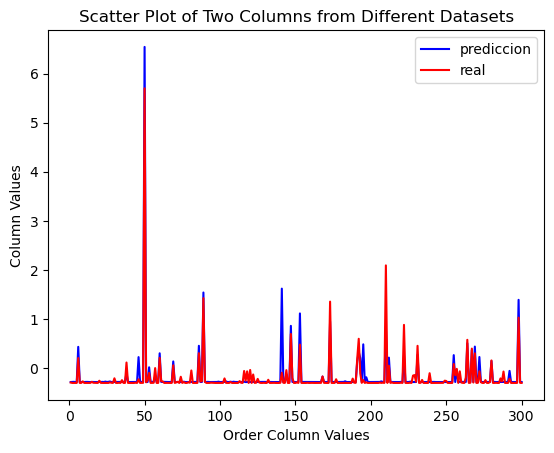

In [119]:
start=0
end=300


# Create a scatter plot using 'order_column' as the x-axis
plt.plot(df['new_column'][start:end], df[0][start:end], color='blue', label='prediccion')
plt.plot(df1['new_column'][start:end], df1['consumption'][start:end], color='red', label='real')

# Customize the plot
plt.title('Scatter Plot of Two Columns from Different Datasets')
plt.xlabel('Order Column Values')
plt.ylabel('Column Values')
plt.legend()

# Display the plot
plt.show()


In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df1['consumption'], df[0])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(df1['consumption'], df[0], squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.03457631626737844
Root Mean Squared Error (RMSE): 0.18594707921174358


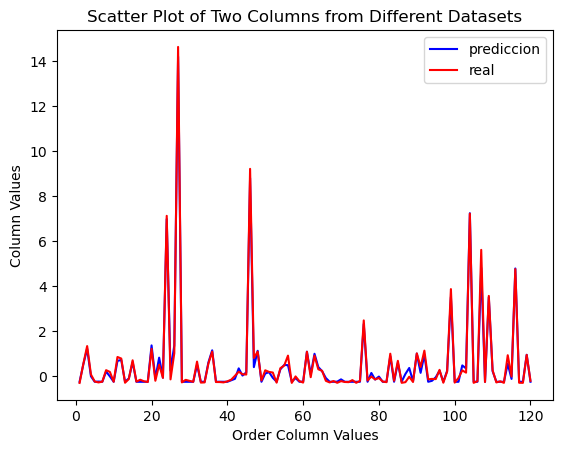

In [101]:
# Example DataFrames:
# df1 = pd.DataFrame({'order_column': [1, 2, 3, 4], 'column1': [1, 2, 3, 4]})
# df2 = pd.DataFrame({'order_column': [1, 2, 3, 4], 'column2': [5, 6, 7, 8]})

start=0
end=120


# Create a scatter plot using 'order_column' as the x-axis
plt.plot(df['new_column'][start:end], df[1][start:end], color='blue', label='prediccion')
plt.plot(df1['new_column'][start:end], df1['production'][start:end], color='red', label='real')

# Customize the plot
plt.title('Scatter Plot of Two Columns from Different Datasets')
plt.xlabel('Order Column Values')
plt.ylabel('Column Values')
plt.legend()

# Display the plot
plt.show()

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df1['production'], df[1])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(df1['production'], df[1], squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.04331637522060545
Root Mean Squared Error (RMSE): 0.2081258638915535


In [103]:
# Modelo para historical

In [104]:
# Split the data into training and testing sets
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_train_h, y_train_h, test_size=0.2, random_state=42)

In [105]:
# Define a simple neural network model with two output neurons
modelh = Sequential()
modelh.add(InputLayer((75,)))
modelh.add(Dense(units=16, activation='relu'))
modelh.add(Dense(units=8, activation='relu'))
modelh.add(Dense(units=4, activation='relu'))
modelh.add(Dense(units=2, activation='linear'))  # Two output neurons for two target variables
modelh.compile(optimizer='adam', loss='mean_squared_error')
modelh.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                1216      
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
Total params: 1398 (5.46 KB)
Trainable params: 1398 (5.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
cph = ModelCheckpoint('modelh/', save_best_only=True)
modelf.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [107]:
# Train the model
modelh.fit(X_train_h, y_train_h, epochs=30, validation_data=(X_test_h, y_test_h), callbacks=[cph])

Epoch 1/30
61438/61476 [============================>.] - ETA: 0s - loss: 0.0846INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 77s 1ms/step - loss: 0.0846 - val_loss: 0.0541
Epoch 2/30
61428/61476 [============================>.] - ETA: 0s - loss: 0.0527INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 74s 1ms/step - loss: 0.0527 - val_loss: 0.0503
Epoch 3/30
61432/61476 [============================>.] - ETA: 0s - loss: 0.0499INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 74s 1ms/step - loss: 0.0499 - val_loss: 0.0476
Epoch 4/30
61439/61476 [============================>.] - ETA: 0s - loss: 0.0414INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 77s 1ms/step - loss: 0.0414 - val_loss: 0.0367
Epoch 5/30
61476/61476 [==============================] - 73s 1ms/step - loss: 0.0362 - val_loss: 0.0374
Epoch 6/30
61447/61476 [============================>.] - ETA: 0s - loss: 0.0348INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 73s 1ms/step - loss: 0.0348 - val_loss: 0.0352
Epoch 7/30
61476/61476 [==============================] - ETA: 0s - loss: 0.0341INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 72s 1ms/step - loss: 0.0341 - val_loss: 0.0329
Epoch 8/30
61447/61476 [============================>.] - ETA: 0s - loss: 0.0337INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 72s 1ms/step - loss: 0.0337 - val_loss: 0.0324
Epoch 9/30
61440/61476 [============================>.] - ETA: 0s - loss: 0.0332INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 71s 1ms/step - loss: 0.0332 - val_loss: 0.0323
Epoch 10/30
61453/61476 [============================>.] - ETA: 0s - loss: 0.0329INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 71s 1ms/step - loss: 0.0328 - val_loss: 0.0321
Epoch 11/30
61476/61476 [==============================] - 71s 1ms/step - loss: 0.0325 - val_loss: 0.0326
Epoch 12/30
61476/61476 [==============================] - 71s 1ms/step - loss: 0.0323 - val_loss: 0.0347
Epoch 13/30
61476/61476 [==============================] - 71s 1ms/step - loss: 0.0321 - val_loss: 0.0330
Epoch 14/30
61439/61476 [============================>.] - ETA: 0s - loss: 0.0319INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 72s 1ms/step - loss: 0.0320 - val_loss: 0.0318
Epoch 15/30
61476/61476 [==============================] - 71s 1ms/step - loss: 0.0318 - val_loss: 0.0326
Epoch 16/30
61453/61476 [============================>.] - ETA: 0s - loss: 0.0316INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 72s 1ms/step - loss: 0.0316 - val_loss: 0.0314
Epoch 17/30
61476/61476 [==============================] - 72s 1ms/step - loss: 0.0316 - val_loss: 0.0320
Epoch 18/30
61444/61476 [============================>.] - ETA: 0s - loss: 0.0315INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 72s 1ms/step - loss: 0.0315 - val_loss: 0.0314
Epoch 19/30
61434/61476 [============================>.] - ETA: 0s - loss: 0.0314INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 72s 1ms/step - loss: 0.0314 - val_loss: 0.0311
Epoch 20/30
61476/61476 [==============================] - 72s 1ms/step - loss: 0.0313 - val_loss: 0.0316
Epoch 21/30
61476/61476 [==============================] - 72s 1ms/step - loss: 0.0311 - val_loss: 0.0317
Epoch 22/30
61476/61476 [==============================] - 73s 1ms/step - loss: 0.0311 - val_loss: 0.0316
Epoch 23/30
61463/61476 [============================>.] - ETA: 0s - loss: 0.0309INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 72s 1ms/step - loss: 0.0309 - val_loss: 0.0303
Epoch 24/30
61476/61476 [==============================] - 72s 1ms/step - loss: 0.0308 - val_loss: 0.0333
Epoch 25/30
61476/61476 [==============================] - 72s 1ms/step - loss: 0.0308 - val_loss: 0.0308
Epoch 26/30
61476/61476 [==============================] - 72s 1ms/step - loss: 0.0307 - val_loss: 0.0309
Epoch 27/30
61476/61476 [==============================] - 72s 1ms/step - loss: 0.0307 - val_loss: 0.0311
Epoch 28/30
61461/61476 [============================>.] - ETA: 0s - loss: 0.0305INFO:tensorflow:Assets written to: modelh\assets


INFO:tensorflow:Assets written to: modelh\assets


61476/61476 [==============================] - 72s 1ms/step - loss: 0.0305 - val_loss: 0.0300
Epoch 29/30
61476/61476 [==============================] - 72s 1ms/step - loss: 0.0306 - val_loss: 0.0305
Epoch 30/30
61476/61476 [==============================] - 72s 1ms/step - loss: 0.0305 - val_loss: 0.0309


In [108]:
from tensorflow.keras.models import load_model
modelh = load_model('modelh/')

In [109]:
# Make predictions on the test set
y_pred_h = modelh.predict(X_test_h)

15369/15369 [==============================] - 11s 737us/step


In [110]:
y_pred_h_array = np.array(y_pred_h)

In [111]:
dfh = pd.DataFrame(y_pred_h_array[:,:])

In [112]:
# Alternatively, using np.arange:
dfh['new_column'] = np.arange(1, len(dfh) + 1)

# Display the DataFrame with the new column
print(dfh)


               0         1  new_column
0      -0.278481 -0.237377           1
1      -0.298149 -0.166981           2
2      -0.298416 -0.206884           3
3      -0.298463 -0.213823           4
4      -0.298272 -0.185345           5
...          ...       ...         ...
491800 -0.298331 -0.194228      491801
491801 -0.298894 -0.278377      491802
491802 -0.231716  1.111695      491803
491803 -0.296779  0.037957      491804
491804 -0.292365  0.697845      491805

[491805 rows x 3 columns]


In [113]:
df1h=y_test_h
df1h

,consumption,production
2293,-0.185733,-0.171123
1015839,-0.299636,-0.151866
2180485,-0.302171,-0.230189
1079143,-0.301866,-0.270765
2362394,-0.299710,-0.270973
...,...,...
1063160,-0.302171,-0.197522
1095099,-0.302054,-0.296566
765828,0.131907,1.122116
2287292,-0.302171,0.065585


In [114]:
# Alternatively, using np.arange:
df1h['new_column'] = np.arange(1, len(df1h) + 1)

# Display the DataFrame with the new column
print(df1h)


         consumption  production  new_column
2293       -0.185733   -0.171123           1
1015839    -0.299636   -0.151866           2
2180485    -0.302171   -0.230189           3
1079143    -0.301866   -0.270765           4
2362394    -0.299710   -0.270973           5
...              ...         ...         ...
1063160    -0.302171   -0.197522      491801
1095099    -0.302054   -0.296566      491802
765828      0.131907    1.122116      491803
2287292    -0.302171    0.065585      491804
1949130    -0.301575    0.650009      491805

[491805 rows x 3 columns]


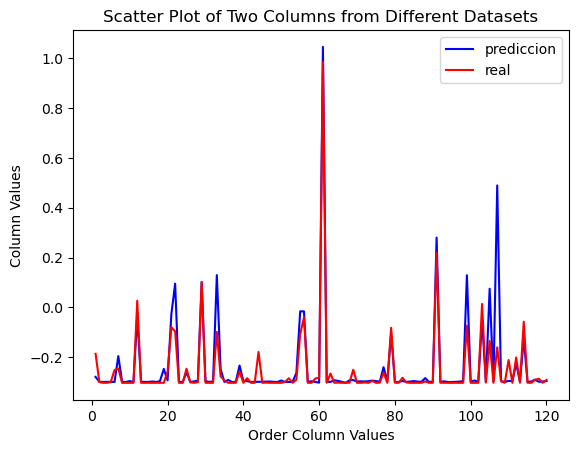

In [115]:
# Example DataFrames:
# df1 = pd.DataFrame({'order_column': [1, 2, 3, 4], 'column1': [1, 2, 3, 4]})
# df2 = pd.DataFrame({'order_column': [1, 2, 3, 4], 'column2': [5, 6, 7, 8]})

start=0
end=120


# Create a scatter plot using 'order_column' as the x-axis
plt.plot(dfh['new_column'][start:end], dfh[0][start:end], color='blue', label='prediccion')
plt.plot(df1h['new_column'][start:end], df1h['consumption'][start:end], color='red', label='real')

# Customize the plot
plt.title('Scatter Plot of Two Columns from Different Datasets')
plt.xlabel('Order Column Values')
plt.ylabel('Column Values')
plt.legend()

# Display the plot
plt.show()


In [116]:

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df1h['consumption'], dfh[0])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(df1h['consumption'], dfh[0], squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.022105068571699596
Root Mean Squared Error (RMSE): 0.14867773394728478


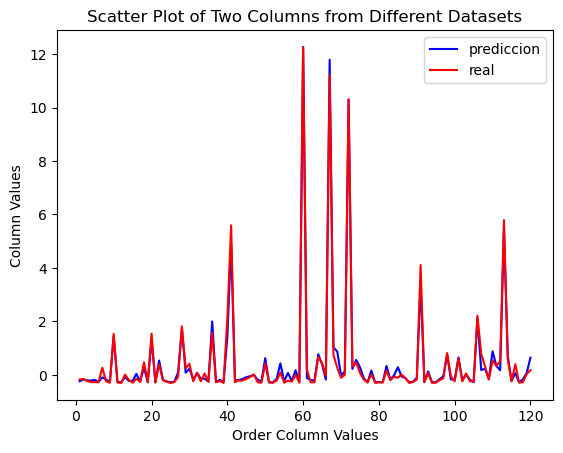

In [117]:
# Example DataFrames:
# df1 = pd.DataFrame({'order_column': [1, 2, 3, 4], 'column1': [1, 2, 3, 4]})
# df2 = pd.DataFrame({'order_column': [1, 2, 3, 4], 'column2': [5, 6, 7, 8]})

start=0
end=120


# Create a scatter plot using 'order_column' as the x-axis
plt.plot(dfh['new_column'][start:end], dfh[1][start:end], color='blue', label='prediccion')
plt.plot(df1h['new_column'][start:end], df1h['production'][start:end], color='red', label='real')

# Customize the plot
plt.title('Scatter Plot of Two Columns from Different Datasets')
plt.xlabel('MUESTRAS')
plt.ylabel('CONSUMO')
plt.legend()

# Display the plot
plt.show()

In [118]:

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df1h['production'], dfh[1])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(df1h['production'], dfh[1], squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.037922797967957625
Root Mean Squared Error (RMSE): 0.19473776718437957
